# 包导入

In [1]:
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing  #预处理
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True) #显示科学计数法
from sklearn.model_selection import train_test_split #数据集划分
import seaborn as sns 

%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #设置中文字体为黑体
plt.rcParams['axes.unicode_minus'] = False #正常显示负号
np.set_printoptions(suppress= True)

# 数据的读取与处理

In [2]:
df_path = 'D:\\dataanalyse\\learning_materials\\大工具课第二期\\自己实操\\项目三\\B站数据.xlsx'
bili = pd.read_excel(df_path)

In [3]:
bili.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   转发      422 non-null    int64         
 1   收藏      422 non-null    int64         
 2   投币      422 non-null    int64         
 3   点赞      422 non-null    int64         
 4   弹幕数     422 non-null    int64         
 5   播放数     422 non-null    int64         
 6   所属分区    422 non-null    object        
 7   排名      400 non-null    float64       
 8   up主     400 non-null    object        
 9   视频标题    422 non-null    object        
 10  发布时间    422 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 36.4+ KB


In [4]:
bili.所属分区.unique()  #查看有哪些分区的数据

array(['游戏区', '舞蹈区', '知识区', '全站'], dtype=object)

In [5]:
bili.head()

,转发,收藏,投币,点赞,弹幕数,播放数,所属分区,排名,up主,视频标题,发布时间
0,131,4756,14000,56000,1660,372000,游戏区,55.0,Allen火花,【我一定要成为爆枪英雄】暴君！轻一点！,2021-07-09 12:38:17
1,1419,3345,8765,76000,1435,754000,游戏区,16.0,经常口胡的管子,当五个回复能力极强的英雄聚在一起！五奶不死流诞生了,2021-07-10 11:40:00
2,243,1737,595,3061,137,53000,舞蹈区,70.0,百度金泰妍吧,【金泰妍】1thK Weekend Performance特别版4k,2021-07-09 18:53:19
3,322,2588,5743,28000,2163,274000,知识区,35.0,影视飓风,【UP主画质改造】8小时极限爆改小白测评工作室！,2021-07-09 17:05:38
4,163,1066,541,1438,13,19000,知识区,NaN,NaN,教大家一个在职场非常实用的爬虫小技巧，人人都能学会~,2020-06-28 21:00:28


In [6]:
#数据切分
game= bili[bili.所属分区.str.contains('游戏区')]
knowledge = bili[bili.所属分区.str.contains('知识区')]
dance= bili[bili.所属分区.str.contains('舞蹈区')]

#将 up主空白地方填充上戴师兄
bili.loc[bili.up主.isna(),'up主']= '戴师兄'
dsx= bili[bili.up主.str.contains('戴师兄')]

In [7]:
dsx.head(5)

,转发,收藏,投币,点赞,弹幕数,播放数,所属分区,排名,up主,视频标题,发布时间
4,163,1066,541,1438,13,19000,知识区,NaN,戴师兄,教大家一个在职场非常实用的爬虫小技巧，人人都能学会~,2020-06-28 21:00:28
68,78,938,604,730,309,14000,知识区,NaN,戴师兄,【戴师兄】数据分析业务真题讲解，看完就能掌握7步解题法哦~,2020-08-13 20:00:55
115,75,926,787,866,210,17000,知识区,NaN,戴师兄,【戴师兄】Tableau动态图表/动态仪表盘制作教程|数据动图教程|动态可视化教程|SQL教...,2020-08-18 20:38:52
118,112,1605,1032,1312,271,24000,知识区,NaN,戴师兄,【数据分析求职/找实习全攻略】数据分析要学什么？如何制作数据作品？面试常见问题如何回答？数分...,2020-07-09 02:36:43
119,81,534,319,482,53,8990,知识区,NaN,戴师兄,全网最良心的【简历制作攻略】它来了！转行怎么写简历？如何针对新岗位进行简历升级？简历没内容可...,2021-03-29 21:46:29


# 相关性矩阵散点图

## 游戏区

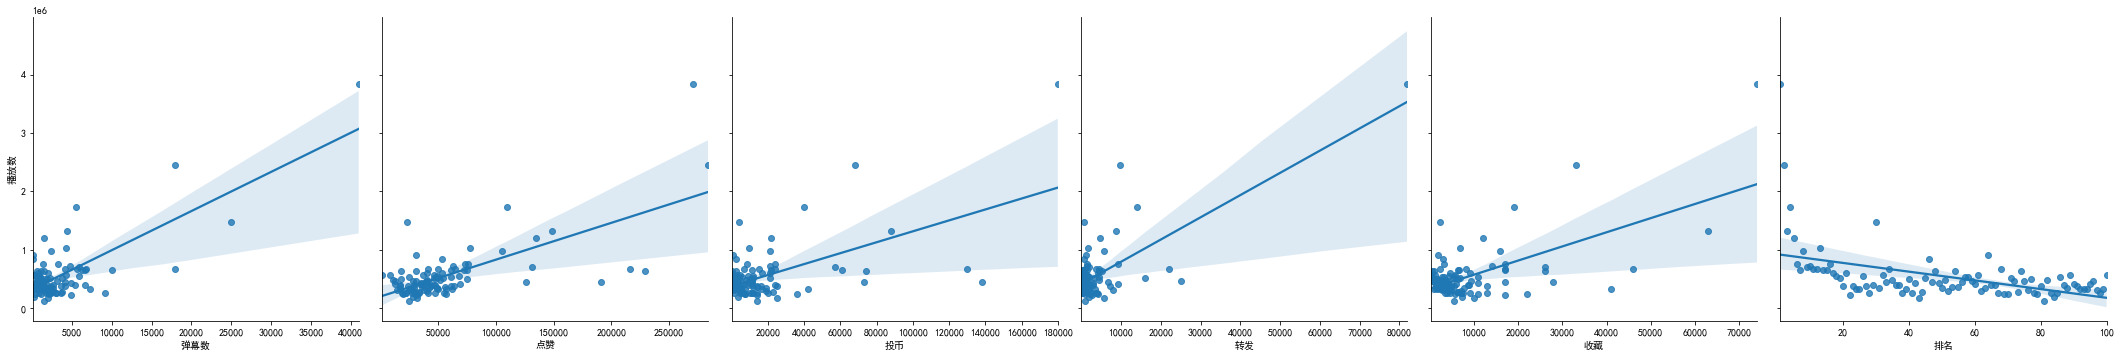

In [41]:
#fig = plt.figure(figsize=(20,8))
sns.pairplot(game
            ,kind='reg'
            ,x_vars = ['弹幕数','点赞','投币','转发','收藏','排名']
            ,y_vars =['播放数']
            ,height = 5)

## 知识区

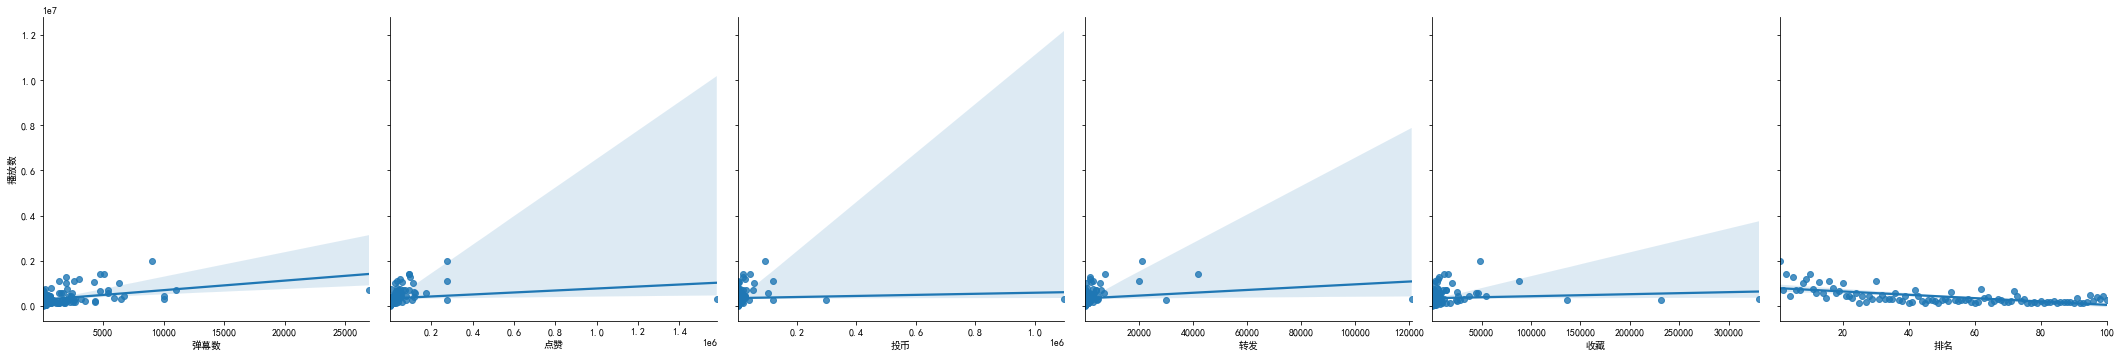

In [42]:
sns.pairplot(knowledge
            ,kind='reg'
            ,x_vars = ['弹幕数','点赞','投币','转发','收藏','排名']
            ,y_vars =['播放数']
            ,height = 5)   #调整大小

## 舞蹈区

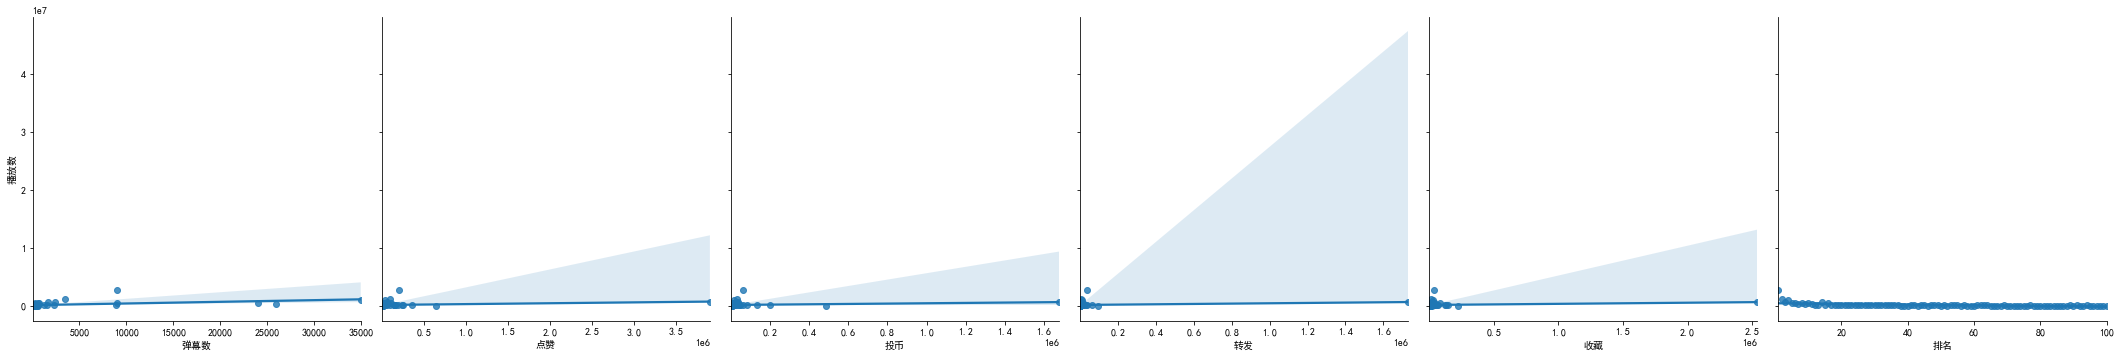

In [43]:
sns.pairplot(dance
            ,kind='reg'
            ,x_vars = ['弹幕数','点赞','投币','转发','收藏','排名']
            ,y_vars =['播放数']
            ,height = 5)   #调整大小

# 各变量和播放量的相关性

## 整体数据的相关性

In [11]:
bili.corr()  #给出相关系数矩阵

,转发,收藏,投币,点赞,弹幕数,播放数,排名
转发,1.000000,0.985417,0.804787,0.917486,0.031725,0.071726,-0.082214
收藏,0.985417,1.000000,0.850371,0.937324,0.037104,0.067162,-0.098491
投币,0.804787,0.850371,1.000000,0.942077,0.065733,0.201083,-0.131009
点赞,0.917486,0.937324,0.942077,1.000000,0.063933,0.225491,-0.130393
弹幕数,0.031725,0.037104,0.065733,0.063933,1.000000,0.361055,-0.157651
播放数,0.071726,0.067162,0.201083,0.225491,0.361055,1.000000,-0.397054
排名,-0.082214,-0.098491,-0.131009,-0.130393,-0.157651,-0.397054,1.000000


In [12]:
bili.corr()['播放数'].sort_values(ascending=False)   #改进 只显示播放数与其他变量之间的相关系数

播放数    1.000000
弹幕数    0.361055
点赞     0.225491
投币     0.201083
转发     0.071726
收藏     0.067162
排名    -0.397054
Name: 播放数, dtype: float64

## 游戏区

In [13]:
game.corr()['播放数'].sort_values(ascending=False).rename('游戏区')

播放数    1.000000
弹幕数    0.767067
转发     0.732839
点赞     0.684210
收藏     0.616986
投币     0.582462
排名    -0.464442
Name: 游戏区, dtype: float64

## 知识区

In [14]:
knowledge.corr()['播放数'].sort_values(ascending=False).rename('知识区')

播放数    1.000000
弹幕数    0.396488
转发     0.219498
点赞     0.191857
收藏     0.103799
投币     0.072393
排名    -0.625640
Name: 知识区, dtype: float64

## 舞蹈区

In [15]:
dance.corr()['播放数'].sort_values(ascending=False).rename('舞蹈区')

播放数    1.000000
弹幕数    0.452911
点赞     0.185009
投币     0.160108
转发     0.155496
收藏     0.152634
排名    -0.513211
Name: 舞蹈区, dtype: float64

# 选取高相关性变量进行建模（切训练集和测试集）

## 游戏区

In [16]:
game_x,game_y = game[['弹幕数','转发','点赞']],game['播放数']
print(game.corr()['播放数'].sort_values(ascending=False))
# 游戏区相关度最高分别为 弹幕、转发、点赞
g_model = LinearRegression()
gx_train,gx_test,gy_train,gy_test = train_test_split(game_x,game_y,train_size=0.8,random_state=0)
g_model.fit(game_x,game_y)

train_score = g_model.score(gx_train,gy_train)
cv_score = g_model.score(gx_test,gy_test)
print('train_score:{};cv_score:{}'.format(train_score,cv_score))

播放数    1.000000
弹幕数    0.767067
转发     0.732839
点赞     0.684210
收藏     0.616986
投币     0.582462
排名    -0.464442
Name: 播放数, dtype: float64
train_score:0.47402759269596595;cv_score:0.9184230025297684


### 游戏区模型优化

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

#创建一个多项式拟合函数

def polynoamial_model(degree = 1):
    polynaomial_features = PolynomialFeatures(degree = degree,include_bias= False)
    liner_regression = LinearRegression(normalize=True)  #nomalize 进行特征归一化
    pipeline = Pipeline([("polynomial_features",polynaomial_features),
                        ("liner_regression",liner_regression)])
    return pipeline

# 二阶
g2_model = polynoamial_model(degree=2)

g2_model.fit(gx_train,gy_train)

train_score = g2_model.score(gx_train,gy_train)
cv_score =g2_model.score(gx_test,gy_test)
print("train_score:{};cv_score:{}".format(train_score,cv_score))

train_score:0.6890735664989927;cv_score:-10.925709448373526


说明
    cv_score:-10.9257  数据太少，过拟合了

## 知识区

In [18]:
knowledge_x , knowledge_y = knowledge[['弹幕数','转发','点赞']] , knowledge['播放数']
print(knowledge.corr()['播放数'].sort_values(ascending=False))
#知识区相关度最高分别为 弹幕、转发、点赞
k_model = LinearRegression()
kx_train, kx_test, ky_train, ky_test = train_test_split(knowledge_x, knowledge_y, train_size=.8,random_state=0)
k_model.fit(knowledge_x,knowledge_y)

train_score = k_model.score(kx_train,ky_train)
cv_score = k_model.score(kx_test,ky_test)
print('train_score:{};cv_score:{}'.format(train_score,cv_score))

播放数    1.000000
弹幕数    0.396488
转发     0.219498
点赞     0.191857
收藏     0.103799
投币     0.072393
排名    -0.625640
Name: 播放数, dtype: float64
train_score:0.1079299814109137;cv_score:0.3037962370312163


### 模型优化

In [19]:
# 二阶
k2_model = polynoamial_model(degree=2)

k2_model.fit(kx_train,ky_train)

train_score = k2_model.score(kx_train,ky_train)
cv_score =k2_model.score(kx_test,ky_test)
print("train_score:{};cv_score:{}".format(train_score,cv_score))

train_score:0.48986025960611346;cv_score:0.6065518279335059


In [20]:
# 三阶
k2_model = polynoamial_model(degree=3)

k2_model.fit(kx_train,ky_train)

train_score = k2_model.score(kx_train,ky_train)
cv_score =k2_model.score(kx_test,ky_test)
print("train_score:{};cv_score:{}".format(train_score,cv_score))

train_score:0.6310612314438848;cv_score:-6.081322468093106


## 舞蹈区

In [21]:
dance_x,dance_y =dance[['弹幕数','点赞','投币']],dance['播放数']
print(dance.corr()['播放数'].sort_values(ascending=False))
# 舞蹈区相关最高分别为 弹幕、点赞、投币
d_model = LinearRegression()
dx_train,dx_test,dy_train,dy_test = train_test_split(dance_x,dance_y,test_size=0.8,random_state=0)
d_model.fit(dance_x,dance_y)

train_score = d_model.score(dx_train,dy_train)
cv_score = d_model.score(dx_test,dy_test)
print('train_score:{};cv_score:{}'.format(train_score,cv_score))

播放数    1.000000
弹幕数    0.452911
点赞     0.185009
投币     0.160108
转发     0.155496
收藏     0.152634
排名    -0.513211
Name: 播放数, dtype: float64
train_score:0.685854001248029;cv_score:0.20307337162229888


### 模型优化

In [22]:
d2_model = polynoamial_model(degree=1)

d2_model.fit(dx_train,dy_train)

train_score = d2_model.score(dx_train,dy_train)
cv_score =d2_model.score(dx_test,dy_test)
print("train_score:{};cv_score:{}".format(train_score,cv_score))

train_score:0.8146059215953341;cv_score:-15.71739595544932


    过拟合了

# 返回截距、系数

In [23]:
print('游戏区：\n截距：%.2f\n系数:'%g_model.intercept_,g_model.coef_)

游戏区：
截距：210187.73
系数: [38.02957148 13.48007669  3.00775972]


In [24]:
print('知识区：\n截距：%.2f\n系数:'%k_model.intercept_,k_model.coef_)

知识区：
截距：257376.04
系数: [39.85204624  9.47648912 -0.41118799]


In [25]:
print('舞蹈区：\n截距：%.2f\n系数:'%d_model.intercept_,d_model.coef_)

舞蹈区：
截距：119774.26
系数: [28.1621048   1.02890596 -2.0300377 ]


# 回归方程

In [26]:
print('Y_game = %.2f + %.2f*弹幕数 + %.2f*转发 + %.2f*点赞'%(g_model.intercept_
                                                       ,g_model.coef_[0]
                                                       ,g_model.coef_[1],g_model.coef_[2]))

Y_game = 210187.73 + 38.03*弹幕数 + 13.48*转发 + 3.01*点赞


In [27]:
print('Y_knowledge = %.2f + %.2f*弹幕数 + %.2f*转发 + %.2f*点赞'%(k_model.intercept_
                                                       ,k_model.coef_[0]
                                                       ,k_model.coef_[1]
                                                       ,k_model.coef_[2]))

Y_knowledge = 257376.04 + 39.85*弹幕数 + 9.48*转发 + -0.41*点赞


In [44]:
print('Y_dance = %.2f + %.2f*弹幕数 + %.2f*点赞 + %.2f*投币'%(d_model.intercept_
                                                       ,d_model.coef_[0]
                                                       ,d_model.coef_[1]
                                                       ,d_model.coef_[2]))

Y_dance = 119774.26 + 28.16*弹幕数 + 1.03*点赞 + -2.03*投币


# 总结

In [28]:
k = pd.DataFrame(knowledge.corr()['播放数'].sort_values(ascending=False).rename('知识区'))
g = pd.DataFrame(game.corr()['播放数'].sort_values(ascending=False).rename('游戏区'))
d = pd.DataFrame(dance.corr()['播放数'].sort_values(ascending=False).rename('舞蹈区'))

In [29]:
df = pd.DataFrame()
list_ = [k,g,d]
for i in list_:
    df = pd.concat([df,i],axis=1)

In [30]:
df

,知识区,游戏区,舞蹈区
播放数,1.000000,1.000000,1.000000
弹幕数,0.396488,0.767067,0.452911
转发,0.219498,0.732839,0.155496
点赞,0.191857,0.684210,0.185009
收藏,0.103799,0.616986,0.152634
投币,0.072393,0.582462,0.160108
排名,-0.625640,-0.464442,-0.513211


## 小结

    对于各个分区，相关性最高的变量分别为：
    知识区：弹幕、转发、点赞
    游戏区：弹幕、转发、点赞
    舞蹈区：弹幕、点赞、投币
    能否让用户在弹幕互动，并且引发共鸣转发点赞是视频起量的关键

# 小练习

## 数据查看

In [31]:
dsx.head()

,转发,收藏,投币,点赞,弹幕数,播放数,所属分区,排名,up主,视频标题,发布时间
4,163,1066,541,1438,13,19000,知识区,NaN,戴师兄,教大家一个在职场非常实用的爬虫小技巧，人人都能学会~,2020-06-28 21:00:28
68,78,938,604,730,309,14000,知识区,NaN,戴师兄,【戴师兄】数据分析业务真题讲解，看完就能掌握7步解题法哦~,2020-08-13 20:00:55
115,75,926,787,866,210,17000,知识区,NaN,戴师兄,【戴师兄】Tableau动态图表/动态仪表盘制作教程|数据动图教程|动态可视化教程|SQL教...,2020-08-18 20:38:52
118,112,1605,1032,1312,271,24000,知识区,NaN,戴师兄,【数据分析求职/找实习全攻略】数据分析要学什么？如何制作数据作品？面试常见问题如何回答？数分...,2020-07-09 02:36:43
119,81,534,319,482,53,8990,知识区,NaN,戴师兄,全网最良心的【简历制作攻略】它来了！转行怎么写简历？如何针对新岗位进行简历升级？简历没内容可...,2021-03-29 21:46:29


In [32]:
dsx.corr()['播放数'].sort_values(ascending= False)

播放数    1.000000
点赞     0.970786
收藏     0.927155
转发     0.922612
投币     0.920872
弹幕数    0.616626
排名          NaN
Name: 播放数, dtype: float64

## 可视化

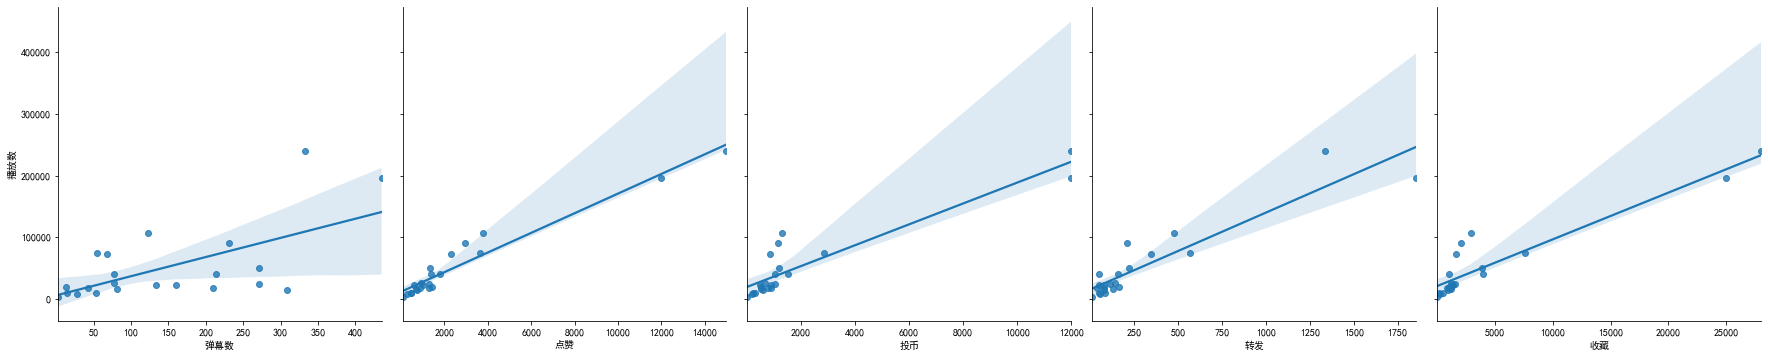

In [45]:
sns.pairplot(dsx
            ,kind='reg'
            ,x_vars = ['弹幕数','点赞','投币','转发','收藏']
            ,y_vars =['播放数']
            ,height = 5)

## 建模分析

In [34]:
dsx_x,dsx_y =dsx[['点赞','收藏','转发']],dsx['播放数']
print(dsx.corr()['播放数'].sort_values(ascending=False))
# 舞蹈区相关最高分别为 '点赞','收藏','转发'
ds_model = LinearRegression()
dsx_train,dsx_test,dsy_train,dsy_test = train_test_split(dsx_x,dsx_y,test_size=0.8,random_state=0)
ds_model.fit(dsx_x,dsx_y)

train_score = ds_model.score(dsx_train,dsy_train)
cv_score = ds_model.score(dsx_test,dsy_test)
print('train_score:{};cv_score:{}'.format(train_score,cv_score))

播放数    1.000000
点赞     0.970786
收藏     0.927155
转发     0.922612
投币     0.920872
弹幕数    0.616626
排名          NaN
Name: 播放数, dtype: float64
train_score:0.9685635859085155;cv_score:0.9562087587269978


## 回归方程

In [35]:
print('戴师兄：\n截距：%.2f\n系数:'%ds_model.intercept_,ds_model.coef_)

戴师兄：
截距：6342.97
系数: [23.83989331 -6.07715833 34.85474554]


In [37]:
print('Y_dsx = %.2f + %.2f*点赞 + %.2f*收藏 + %.2f*转发'%(ds_model.intercept_
                                                       ,ds_model.coef_[0]
                                                       ,ds_model.coef_[1]
                                                       ,ds_model.coef_[2]))

Y_dsx = 6342.97 + 23.84*点赞 + -6.08*收藏 + 34.85*转发


In [ ]:
戴师兄相关性最高的变量分别为；
    点赞、收藏、转发
能否让用户点赞，收藏并转发给是视频起量的关键

    路漫漫其修远兮